# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- These factors will be ‘major catalysts’ for ‘exponential’ rise in Bitcoin, Ethereum prices.  Two of the largest cryptocurrency tokens, Bitcoin and Ethereum have defied several odds over the years. Bitcoin was roughly flat over the past 24 hours, suggesting that investor enthusiasm over the Bitcoin blockchain’s Taproot upgrade over the week, is starting to fade. Ethereum, the largest altcoin suffered a few speculations as well, post-upgrade. Nonetheless, both [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/these-factors-will-be-major-catalysts-for-exponential-rise-in-bitcoin-ethereum-prices/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid: Fresh protests in Europe against new restrictions.  Riots erupt in the Netherlands for a second night, with protests held in Austria, Italy and France. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-europe-59363256) 

### Kainų kaita pandemijos metu

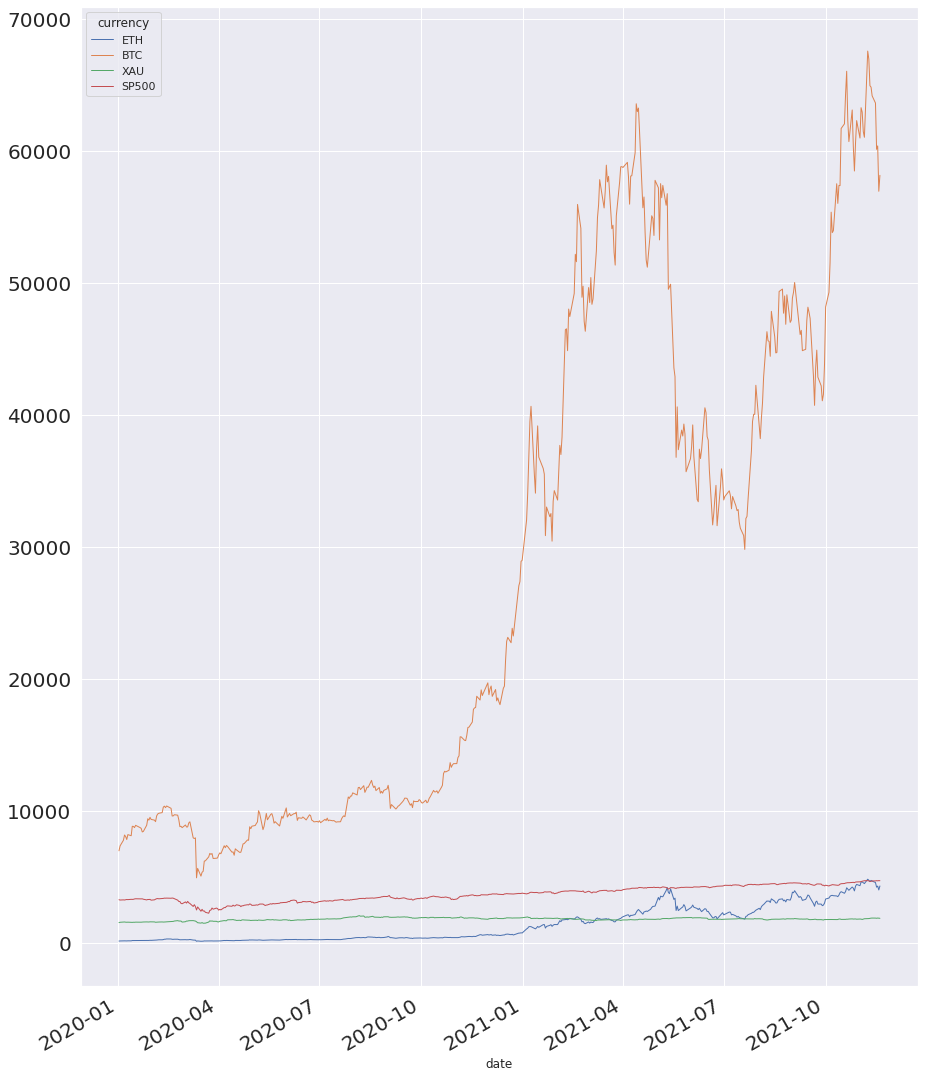

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.908022,0.162362,0.904489
BTC,0.908022,1.000000,0.136230,0.873183
XAU,0.162362,0.136230,1.000000,0.317060
SP500,0.904489,0.873183,0.317060,1.000000


In [8]:
#hide ### Koreliacijos matrica.

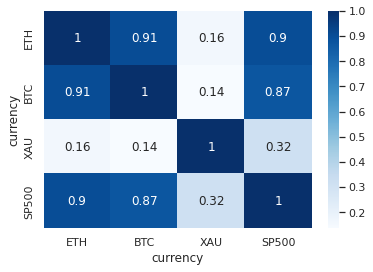

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')